In [24]:
#https://www.knsh.com.tw/_KNSH/Version.asp
#https://www.knsh.com.tw/_KNSH/Version.asp?Year=10921&City=C&Zip=201&School=SCB009
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
import re
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC



In [56]:
url='https://www.knsh.com.tw/_KNSH/Version.asp'

options = Options()
options.headless = False
driverPath = r'C:\Users\user\Documents\GitHub\textbookMarketShare\geckodriver.exe'
driver = webdriver.Firefox(options=options, executable_path=driverPath)
#driver = webdriver.Firefox(executable_path=driverPath)

#headless模式
#options = webdriver.ChromeOptions()
#options.add_argument('--headless')
#driver = webdriver.Chrome(options=options, executable_path='chromedriver.exe')
#driver = webdriver.Chrome(executable_path='chromedriver.exe')

driver.set_page_load_timeout(60)
driver.get(url)


In [40]:

selectYear = Select(driver.find_element_by_name('Year'))
for opYear in selectYear.options:
    print(opYear.text)
    
selectYear.select_by_index(0)

selectCity = Select(driver.find_element_by_name('City'))
for opCity in selectCity.options:
    print(opCity.text)

selectCity.select_by_visible_text(u'基隆市')

selectZip = Select(driver.find_element_by_name('Zip'))
for opZip in selectZip.options:
    print(opZip.text)

selectZip.select_by_index(3)
#selectZip.select_by_visible_text(u'信義區')

#driver.implicitly_wait(1) # seconds

selectSchool = Select(driver.find_element_by_name('School'))
for opSchool in selectSchool.options:
    print(opSchool.text)
    
#selectSchool.select_by_index(0)    

soup = BeautifulSoup(driver.page_source, 'html.parser')

print(soup.prettify())

－請選擇學期－
國小109學年度下學期
國中109學年度下學期
－請選擇縣市－
基隆市
台北市
新北市
桃園市
新竹市
新竹縣
苗栗縣
台中市
彰化縣
南投縣
雲林縣
嘉義市
嘉義縣
台南市
高雄市
屏東縣
台東縣
花蓮縣
宜蘭縣
澎湖縣
金門縣
連江縣
－請選擇區域－
仁愛區
信義區
中正區
中山區
安樂區
暖暖區
七堵區
－請選擇學校－
八斗國小
中正國小
正濱國小
和平國小
忠孝國小
<html lang="en">
 <head>
  <!-- basic -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <!-- mobile metas -->
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="initial-scale=1, maximum-scale=1" name="viewport"/>
  <!-- site metas -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="no-cache" http-equiv="Cache-Control"/>
  <meta content="0" http-equiv="Expires"/>
  <meta content="no-cache" http-equiv="Program"/>
  <meta content="global" name="dirstribation"/>
  <meta content="index,follow" name="robots"/>
  <meta content="1 days" name="revisit"/>
  <meta content="1 days" name="revisit-after"/>
  <meta content="康軒文教集團 - 版本查

In [52]:

data = []
table = soup.find('table', attrs={'class':'footable2 mb-4'})

table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values
    


# 迴圈爬

In [71]:
totalData = []
yearList = []
#定位學期
selectYear = Select(driver.find_element_by_name('Year'))
for opYear in selectYear.options:
    yearList.append(opYear.text)

for i in range(len(yearList) -1 ):
    selectedYear = yearList[i+1]
    print(selectedYear)

    selectYear = Select(driver.find_element_by_name('Year'))
    selectYear.select_by_index(i+1)


    #定位縣市
    cityList = []
    selectCity = Select(driver.find_element_by_name('City'))
    for opCity in selectCity.options:
        cityList.append(opCity.text)
    
    for j in range(len(cityList) -1):
        
        selectYear = Select(driver.find_element_by_name('Year'))
        selectYear.select_by_index(i+1)
        selectCity = Select(driver.find_element_by_name('City'))
        selectedCity = cityList[j+1]
        
        print(selectedCity)
        selectCity.select_by_index(j+1)

        #selectCity.select_by_visible_text(u'基隆市')

        #定位區域
        zipList = []
        selectZip = Select(driver.find_element_by_name('Zip'))
        for opZip in selectZip.options:
            zipList.append(opZip.text)
        
        for k in range(len(zipList) -1):
            

            
            selectedZip = zipList[k+1]
            print(selectedZip)
            
            selectYear = Select(driver.find_element_by_name('Year'))
            selectYear.select_by_index(i+1)
            selectCity = Select(driver.find_element_by_name('City'))
            selectCity.select_by_index(j+1)
            selectZip = Select(driver.find_element_by_name('Zip'))            
            selectZip.select_by_index(k+1)
        
            #driver.implicitly_wait(1) # seconds
            #定位學校
            schoolList = []
            selectSchool = Select(driver.find_element_by_name('School'))
            for opSchool in selectSchool.options:
                schoolList.append(opSchool.text)
                
            print(schoolList)
            for m in range(len(schoolList)-1):

                print(m)
                selectedSchool = schoolList[m+1]
                #print(selectedShool)
                
                selectYear = Select(driver.find_element_by_name('Year'))
                selectYear.select_by_index(i+1)
                selectCity = Select(driver.find_element_by_name('City'))
                selectCity.select_by_index(j+1)
                selectZip = Select(driver.find_element_by_name('Zip'))
                selectZip.select_by_index(k+1)
                selectSchool = Select(driver.find_element_by_name('School'))
                selectSchool.select_by_index(m+1)    
                
                
                schoolData = [selectedYear,selectedCity,selectedZip,selectedSchool]
                soup = BeautifulSoup(driver.page_source, 'html.parser')

                #print(soup.prettify())    
                
                
                data = []
                data.append(schoolData)
                
                table = soup.find('table', attrs={'class':'footable2 mb-4'})

                table_body = table.find('tbody')

                rows = table_body.find_all('tr')
                for row in rows:
                    cols = row.find_all('td')
                    cols = [ele.text.strip() for ele in cols]
                    data.append([ele for ele in cols if ele]) # Get rid of empty values
                    
                totalData.append(data)

國小109學年度下學期
基隆市
仁愛區
['－請選擇學校－', '仁愛國小', '成功國小', '尚智國小', '信義國小', '南榮國小']
0
1
2
3
4
信義區
['－請選擇學校－', '中興國小', '月眉國小', '東光國小', '東信國小', '深美國小', '深澳國小']
0
1
2
3
4
5
中正區
['－請選擇學校－', '八斗國小', '中正國小', '正濱國小', '和平國小', '忠孝國小']
0
1
2
3
4
中山區
['－請選擇學校－', '中山國小', '中和國小', '中華國小', '仙洞國小', '港西國小', '輔大聖心國小', '德和國小']
0
1
2
3
4
5
6
安樂區
['－請選擇學校－', '二信國小', '安樂國小', '西定國小', '武崙國小', '長樂國小', '建德國小', '隆聖國小']
0
1
2
3
4
5
6
暖暖區
['－請選擇學校－', '八堵國小', '暖江國小', '暖西國小', '暖暖國小', '碇內國小']
0
1
2
3
4
七堵區
['－請選擇學校－', '七堵國小', '五堵國小', '尚仁國小', '長興國小', '堵南國小', '復興國小', '華興國小', '瑪陵國小']
0
1
2
3
4
5
6
7
台北市
中正區
['－請選擇學校－', '市大附小', '忠孝國小', '忠義國小', '東門國小', '河堤國小', '南門國小', '國語實小', '螢橋國小']
0
1
2
3
4
5
6
7
大同區
['－請選擇學校－', '大同國小', '大橋國小', '大龍國小', '太平國小', '日新國小', '永樂國小', '延平國小', '蓬萊國小', '雙蓮國小']
0
1
2
3
4
5
6
7
8
中山區
['－請選擇學校－', '大佳國小', '大直國小', '中山國小', '中正國小', '五常國小', '永安國小', '吉林國小', '長安國小', '長春國小', '濱江國小', '懷生國小']
0
1
2
3
4
5
6
7
8
9
10
松山區
['－請選擇學校－', '三民國小', '民生國小', '民族國小', '民權國小', '西松國小', '松山國小', '健康國小', '敦化國小']
0
1
2
3
4
5
6
7
大安區
['－請選擇學

1
2
3
4
5
6
7
8
關西鎮
['－請選擇學校－', '太平國小', '玉山國小', '石光國小', '坪林國小', '東光國小', '東安國小', '南和國小', '錦山國小', '關西國小']
0
1
2
3
4
5
6
7
8
芎林鄉
['－請選擇學校－', '五龍國小', '芎林國小', '碧潭國小']
0
1
2
寶山鄉
['－請選擇學校－', '新城國小', '雙溪國小', '寶山國小']
0
1
2
竹東鎮
['－請選擇學校－', '二重國小', '上館國小', '大同國小', '中山國小', '竹中國小', '竹東國小', '員崠國小', '陸豐國小', '瑞峰國小']
0
1
2
3
4
5
6
7
8
五峰鄉
['－請選擇學校－', '上智國小', '五峰國小', '花園國小', '桃山國小']
0
1
2
3
橫山鄉
['－請選擇學校－', '大肚國小', '內灣國小', '田寮國小', '沙坑國小', '橫山國小']
0
1
2
3
4
尖石鄉
['－請選擇學校－', '玉峰國小', '石磊國小', '尖石國小', '秀巒國小', '梅花國小', '新光國小', '新樂國小', '嘉興國小', '錦屏國小']
0
1
2
3
4
5
6
7
8
北埔鄉
['－請選擇學校－', '大坪國小', '北埔國小']
0
1
峨眉鄉
['－請選擇學校－', '峨眉國小', '富興國小']
0
1
苗栗縣
竹南鎮
['－請選擇學校－', '大埔國小', '山佳國小', '竹南國小', '竹興國小', '海口國小', '頂埔國小', '新南國小', '照南國小']
0
1
2
3
4
5
6
7
頭份市
['－請選擇學校－', '六合國小', '斗煥國小', '永貞國小', '后庄國小', '尖山國小', '信義國小', '信德國小', '建國國小', '新興國小', '僑善國小', '頭份國小', '蟠桃國小']
0
1
2
3
4
5
6
7
8
9
10
11
三灣鄉
['－請選擇學校－', '三灣國小']
0
南庄鄉
['－請選擇學校－', '田美國小', '東河國小', '南庄國小', '南埔國小', '蓬萊國小']
0
1
2
3
4
獅潭鄉
['－請選擇學校－', '永興國小', '獅潭國小', '豐林國小']
0
1
2
後龍鎮


1
2
3
4
5
6
7
8
9
10
11
12
13
14
仁愛鄉
['－請選擇學校－', '力行國小', '中正國小', '互助國小', '仁愛國小', '平靜(都達) 國小', '合作國小', '法治國小', '南豐國小', '春陽國小', '紅葉國小', '清境國小', '發祥國小', '萬豐國小', '親愛國小', '廬山國小']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
名間鄉
['－請選擇學校－', '弓鞋國小', '中山國小', '田豐國小', '名崗國小', '名間國小', '私立弘明實驗高級中學附設小學', '新民國小', '新街國小', '僑興國小']
0
1
2
3
4
5
6
7
8
集集鎮
['－請選擇學校－', '永昌國小', '和平國小', '集集國小', '隘寮國小']
0
1
2
3
水里鄉
['－請選擇學校－', '水里國小', '民和國小', '永興國小', '成城國小', '郡坑國小', '新興國小']
0
1
2
3
4
5
魚池鄉
['－請選擇學校－', '五城國小', '共和國小', '明潭國小', '東光國小', '魚池國小', '新城國小', '德化國小', '頭社國小']
0
1
2
3
4
5
6
7
信義鄉
['－請選擇學校－', '人和國小', '久美國小', '同富國小', '地利國小', '東埔國小', '信義國小', '桐林國小', '隆華國小(神木活動中心)', '愛國國小', '新鄉國小', '潭南國小', '豐丘國小', '雙龍國小', '羅娜國小']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
竹山鎮
['－請選擇學校－', '大鞍國小', '中州國小', '中和國小', '竹山國小', '秀林國小', '延平國小', '社寮國小', '前山國小', '桶頭國小', '雲林國小', '瑞竹國小', '過溪國小', '鯉魚國小']
0
1
2
3
4
5
6
7
8
9
10
11
12
鹿谷鄉
['－請選擇學校－', '內湖國小', '文昌國小', '秀峰國小', '初鄉國小', '鹿谷國小', '瑞田國小', '鳳凰國小', '廣興國小']
0
1
2
3
4
5
6
7
雲林縣
斗南鎮
['－請選擇學校－', '大東國小', '文安國小'

['－請選擇學校－', '加昌國小', '右昌國小', '油廠國小', '後勁國小', '莒光國小', '援中國小', '楠梓國小', '楠陽國小', '翠屏國民中小學']
0
1
2
3
4
5
6
7
8
小港區
['－請選擇學校－', '二苓國小', '小港國小', '太平國小', '坪頂國小', '明義國小', '青山國小', '桂林國小', '港和國小', '華山國小', '漢民國小', '鳳林國小', '鳳陽國小', '鳳鳴國小']
0
1
2
3
4
5
6
7
8
9
10
11
12
左營區
['－請選擇學校－', '文府國小', '左營國小', '永清國小', '明德國小', '屏山國小', '勝利國小', '新上國小', '新民國小', '新光國小', '新莊國小', '福山國小', '舊城國小']
0
1
2
3
4
5
6
7
8
9
10
11
仁武區
['－請選擇學校－', '八卦國小', '仁武國小', '竹後國小', '烏林國小', '登發國小', '灣內國小']
0
1
2
3
4
5
大社區
['－請選擇學校－', '大社國小', '嘉誠國小', '觀音國小']
0
1
2
岡山區
['－請選擇學校－', '兆湘國小', '竹圍國小', '和平國小', '岡山國小', '前峰國小', '後紅國小', '嘉興國小', '壽天國小']
0
1
2
3
4
5
6
7
路竹區
['－請選擇學校－', '一甲國小', '三埤國小', '下坑國小', '大社國小', '北嶺國小', '竹滬國小', '路竹國小', '蔡文國小']
0
1
2
3
4
5
6
7
阿蓮區
['－請選擇學校－', '中路國小', '阿蓮國小', '復安國小']
0
1
2
田寮區
['－請選擇學校－', '崇德國小', '新興國小']
0
1
燕巢區
['－請選擇學校－', '安招國小', '金山國小', '深水國小', '鳳雄國小', '橫山國小', '燕巢國小']
0
1
2
3
4
5
橋頭區
['－請選擇學校－', '五林國小', '仕隆國小', '甲圍國小', '橋頭國小', '興糖國小']
0
1
2
3
4
梓官區
['－請選擇學校－', '梓官國小', '蚵寮國小']
0
1
彌陀區
['－請選擇學校－', '南安國小', '壽齡國小', '彌

13
西嶼鄉
['－請選擇學校－', '大池國小', '內垵國小', '外垵國小', '合橫國小', '池東國小', '竹灣國小']
0
1
2
3
4
5
望安鄉
['－請選擇學校－', '花嶼國小', '將軍國小', '望安國小']
0
1
2
七美鄉
['－請選擇學校－', '七美國小', '雙湖國小']
0
1
白沙鄉
['－請選擇學校－', '中屯國小', '吉貝國小', '赤崁國小', '後寮國小', '鳥嶼國小', '講美國小']
0
1
2
3
4
5
湖西鄉
['－請選擇學校－', '成功國小', '西溪國小', '沙港國小', '湖西國小', '隘門國小', '龍門國小']
0
1
2
3
4
5
金門縣
金沙鎮
['－請選擇學校－', '多年國小', '安瀾國小', '何浦國小', '金沙國小', '述美國小']
0
1
2
3
4
金湖鎮
['－請選擇學校－', '正義國小', '金湖國小', '柏村國小', '開瑄國小']
0
1
2
3
金寧鄉
['－請選擇學校－', '古寧國小', '金鼎國小', '金寧國小', '湖埔國小']
0
1
2
3
金城鎮
['－請選擇學校－', '中正國小', '古城國小', '賢庵國小']
0
1
2
烈嶼鄉
['－請選擇學校－', '上岐國小', '西口國小', '卓環國小']
0
1
2
連江縣
南竿鄉
['－請選擇學校－', '中正國小', '仁愛國小', '介壽國小']
0
1
2
北竿鄉
['－請選擇學校－', '塘岐國小']
0
莒光鄉
['－請選擇學校－', '東莒國小', '敬恆國小']
0
1
東引鄉
['－請選擇學校－', '東引國中小']
0
國中109學年度下學期
基隆市
仁愛區
['－請選擇學校－', '南榮國中', '銘傳國中']
0
1
信義區
['－請選擇學校－', '成功國中', '信義國中']
0
1
中正區
['－請選擇學校－', '二信中學', '八斗高中國中部', '中正國中', '正濱國中']
0
1
2
3
中山區
['－請選擇學校－', '中山高級中學', '聖心中學']
0
1
安樂區
['－請選擇學校－', '安樂高中國中部', '武崙國中', '建德國中']
0
1
2
暖暖區
['－請選擇學校－', '暖暖高級中學', '碇內國中']
0
1
七堵

大村鄉
['－請選擇學校－', '大村國中', '愛因斯坦實驗國中']
0
1
埔鹽鄉
['－請選擇學校－', '埔鹽國中']
0
田中鎮
['－請選擇學校－', '文興中學', '田中高中']
0
1
北斗鎮
['－請選擇學校－', '北斗國中']
0
田尾鄉
['－請選擇學校－', '田尾國中']
0
埤頭鄉
['－請選擇學校－', '埤頭國中']
0
溪州鄉
['－請選擇學校－', '溪州國中', '溪陽國中']
0
1
竹塘鄉
['－請選擇學校－', '竹塘國中']
0
二林鎮
['－請選擇學校－', '二林高級中學', '原斗國中', '萬興國中']
0
1
2
大城鄉
['－請選擇學校－', '大城國中']
0
芳苑鄉
['－請選擇學校－', '芳苑國中', '草湖國中']
0
1
二水鄉
['－請選擇學校－', '二水國中']
0
南投縣
南投市
['－請選擇學校－', '中興國中', '南投國中', '南崗國中', '鳳鳴國中', '營北國中']
0
1
2
3
4
中寮鄉
['－請選擇學校－', '中寮國中', '爽文國中']
0
1
草屯鎮
['－請選擇學校－', '日新國中', '旭光高中', '草屯國中']
0
1
2
國姓鄉
['－請選擇學校－', '北山國中', '北梅國中', '國姓國中']
0
1
2
埔里鎮
['－請選擇學校－', '大成國中', '均頭國中', '宏仁國中', '埔里國中', '普台高中']
0
1
2
3
4
仁愛鄉
['－請選擇學校－', '仁愛國中']
0
名間鄉
['－請選擇學校－', '三光國中', '弘明實驗高級中學', '名間國中']
0
1
2
集集鎮
['－請選擇學校－', '集集國中']
0
水里鄉
['－請選擇學校－', '水里國中', '民和國中']
0
1
魚池鄉
['－請選擇學校－', '三育高級中學', '明潭國中', '魚池國中']
0
1
2
信義鄉
['－請選擇學校－', '同富國中', '信義國中']
0
1
竹山鎮
['－請選擇學校－', '竹山國中', '延和國中', '社寮國中', '瑞竹國中']
0
1
2
3
鹿谷鄉
['－請選擇學校－', '鹿谷國中', '瑞峰國中']
0
1
雲林縣
斗南鎮
['－請選擇學校－', '斗南高中', '東明國中']
0
1
大埤鄉


連江縣
南竿鄉
['－請選擇學校－', '中正中小學', '介壽國中']
0
1
北竿鄉
['－請選擇學校－', '中山國中']
0
莒光鄉
['－請選擇學校－', '敬恆國中']
0
東引鄉
['－請選擇學校－', '東引國中']
0


In [72]:
len(totalData)

3643

# 儲存資料到檔案

In [73]:
#儲存List到Pickle
import pickle
with open('totalData.ob', 'wb') as fp:
    pickle.dump(totalData, fp)
    
##讀取
#with open ('totalData.ob', 'rb') as fp:
#    list_1 = pickle.load(fp)

In [89]:
textbookList = []
for schoolData in totalData:
    year = schoolData[0][0]
    city = schoolData[0][1]
    zipcode = schoolData[0][2]
    school = schoolData[0][3]
    
    subjectsNum = len(schoolData)-1
    for i in range(subjectsNum):
        subjectName = schoolData[i+1][0]  #科目名稱
        gradesNum = len(schoolData[i+1])-1  #使用年級數
        #print(year,city,zipcode,school,subjectName)
        gradeStartFrom1 = ['國語','數學','生活','健康與體育']
        gradeStartFrom4 = ['自然與生科','社會','藝術與人文','綜合活動']        
        
        if year[0:2] == '國小' and subjectName in gradeStartFrom1 :  
            gradeStartfrom = 1
        elif year[0:2] == '國小' and subjectName in gradeStartFrom4 :  
            gradeStartfrom = 4
        elif year[0:2] == '國中':  
            gradeStartfrom = 7
                
        for j in range(gradesNum):
            grade = gradeStartfrom + j
            textbookVer = schoolData[i+1][j+1]
            textbookElement = [year,city,zipcode,school,subjectName,grade,textbookVer]
            textbookList.append(textbookElement)

    
        

In [80]:
year = '國小109學年度下學期'
year[0:2]

'國小'

In [82]:
for schoolData in totalData:
    filter1 = schoolData[0][1] == '新竹市'
    filter2 = schoolData[0][3] == '茄苳國小'
    if (filter1 and filter2):
        print(schoolData)

[['國小109學年度下學期', '新竹市', '新竹市', '茄苳國小'], ['國語', '翰林', '康軒', '康軒', '康軒', '南一', '康軒'], ['數學', '康軒', '康軒', '康軒', '康軒', '康軒', '康軒'], ['生活', '翰林', '康軒'], ['自然與生科自然', '康軒', '康軒', '康軒', '康軒'], ['社會', '南一', '康軒', '康軒', '翰林'], ['藝術與人文藝文'], ['健康與體育健康', '翰林', '翰林', '南一', '南一', '南一', '南一'], ['綜合活動綜合']]


In [93]:
len(textbookList)

114653

In [92]:
for textbook in textbookList:
    filter1 = textbook[0][0:2] == '國中'
    filter2 = textbook[3] == '光華國中'
    if filter1 and filter2 :
        print(textbook)

['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '國文', 7, '南一']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '國文', 8, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '國文', 9, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '英語', 7, '康軒']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '英語', 8, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '英語', 9, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '數學', 7, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '數學', 8, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '數學', 9, '南一']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '自然與生科自然', 7, '康軒']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '自然與生科自然', 8, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '自然與生科自然', 9, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '社會', 7, '康軒']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '社會', 8, '康軒']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '社會', 9, '翰林']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '藝術與人文藝文', 7, '康軒']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '健康與體育健康', 7, '康軒']
['國中109學年度下學期', '新竹市', '新竹市', '光華國中', '健康與體育健康', 8, '康軒']
['國中109學年度下學期', 

# List 轉換成 dataframe

In [133]:
from pandas import DataFrame
import pandas as pd

 
df = DataFrame (textbookList, columns=['學期','縣市','區域','學校','科目','年級','版本'])
df

,學期,縣市,區域,學校,科目,年級,版本
0,國小109學年度下學期,基隆市,仁愛區,仁愛國小,國語,1,康軒
1,國小109學年度下學期,基隆市,仁愛區,仁愛國小,國語,2,康軒
2,國小109學年度下學期,基隆市,仁愛區,仁愛國小,國語,3,康軒
3,國小109學年度下學期,基隆市,仁愛區,仁愛國小,國語,4,南一
4,國小109學年度下學期,基隆市,仁愛區,仁愛國小,國語,5,翰林
5,國小109學年度下學期,基隆市,仁愛區,仁愛國小,國語,6,南一
6,國小109學年度下學期,基隆市,仁愛區,仁愛國小,數學,1,翰林
7,國小109學年度下學期,基隆市,仁愛區,仁愛國小,數學,2,翰林
8,國小109學年度下學期,基隆市,仁愛區,仁愛國小,數學,3,南一
9,國小109學年度下學期,基隆市,仁愛區,仁愛國小,數學,4,康軒


In [134]:
df['學制'] = df['學期'].str[:2]

In [135]:
df.groupby('版本').count()

,學期,縣市,區域,學校,科目,年級,學制
版本,,,,,,,
南一,26622,26622,26622,26622,26622,26622,26622
康軒,50920,50920,50920,50920,50920,50920,50920
翰林,37111,37111,37111,37111,37111,37111,37111


In [136]:
filter1 = df['學制'] == '國中'
filter2 = df['科目'] == '自然與生科自然'
df[filter1  & filter2].groupby('版本').count()

,學期,縣市,區域,學校,科目,年級,學制
版本,,,,,,,
南一,640,640,640,640,640,640,640
康軒,1229,1229,1229,1229,1229,1229,1229
翰林,945,945,945,945,945,945,945


In [188]:
filter1 = df['學制'] == '國中'
filter2 = df['科目'] == '自然與生科自然'
filter3 = df['年級'] == 7
filter4 = df['縣市'] == '新竹市'
df_nature = df[filter1  & filter2 & filter3  ]

table = pd.pivot_table(df_nature,
                       values='學校', 
                       #index=['縣市', '區域'],
                       index=['縣市'],
                       
                       columns='版本',

                       aggfunc='count',
                       fill_value=0)
#換算成比例
cityTable = table.apply(lambda r: r/r.sum(), axis=1)
cityTable

版本,南一,康軒,翰林
縣市,,,
南投縣,0.305556,0.333333,0.361111
台中市,0.216495,0.381443,0.402062
台北市,0.247191,0.483146,0.269663
台南市,0.226667,0.453333,0.320000
台東縣,0.240000,0.280000,0.480000
嘉義市,0.250000,0.416667,0.333333
嘉義縣,0.407407,0.333333,0.259259
基隆市,0.411765,0.235294,0.352941
宜蘭縣,0.071429,0.428571,0.500000


In [181]:
filter1 = df['學制'] == '國中'
filter2 = df['科目'] == '自然與生科自然'
filter3 = df['年級'] == 7

df_nature = df[filter1  & filter2 & filter3 ]

natureCrosstab = pd.crosstab(df_nature['版本'],df_nature['學制'])
natureCrosstab.apply(lambda r: r/r.sum(), axis=0)


學制,國中
版本,
南一,0.235169
康軒,0.438559
翰林,0.326271


# 用 matplotlib 顯示資料
### https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f
### https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621

In [195]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)


Populating the interactive namespace from numpy and matplotlib


In [215]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import *

In [216]:
myfont = FontProperties(fname=r'C:\Windows\Fonts\NotoSansCJKtc-Regular.otf')


In [198]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure',  figsize=(10,6))

In [201]:
shp_path = 'mapdata202104280245/TOWN_MOI_1100415.shp'
sf = shp.Reader(shp_path)

In [202]:
len(sf.shapes())


368

In [203]:
sf.records()[1]


Record #1: ['T21', '10013210', '屏東縣', '佳冬鄉', 'Jiadong Township', 'T', '10013']

In [206]:
sf.records()[1][3]


'佳冬鄉'

In [207]:
sf.records()[25]


Record #25: ['W06', '09020060', '金門縣', '烏坵鄉', 'Wuqiu Township', 'W', '09020']

In [208]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [209]:
df_map = read_shapefile(sf)
df_map.shape

(368, 8)

In [210]:
df_map

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,coords
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"[(121.40981573700003, 23.21369278500009), (121..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"[(120.5484580210001, 22.46067220300006), (120...."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"[(120.3019750420001, 23.816246144000047), (120..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"[(121.49154724300001, 22.677457039000046), (12..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"[(121.61179564200006, 21.942896570000073), (12..."
5,N07,10007120,彰化縣,田中鎮,Tianzhong Township,N,10007,"[(120.58250128300006, 23.876498714000036), (12..."
6,N19,10007170,彰化縣,社頭鄉,Shetou Township,N,10007,"[(120.58558405000008, 23.876870772000075), (12..."
7,T14,10013140,屏東縣,竹田鄉,Zhutian Township,T,10013,"[(120.5046145120001, 22.57314658000007), (120...."
8,T05,10013050,屏東縣,萬丹鄉,Wandan Township,T,10013,"[(120.5046145120001, 22.57314658000007), (120...."
9,K13,10005160,苗栗縣,三灣鄉,Sanwan Township,K,10005,"[(121.008084123, 24.644400718000043), (121.007..."


In [212]:
df_map[df_map.TOWNNAME == '成功鎮']


,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,coords
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"[(121.40981573700003, 23.21369278500009), (121..."


In [217]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontproperties=myfont, size=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(121.34744064843372, 23.139652605160492)

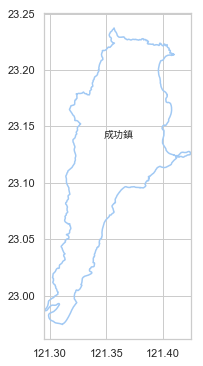

In [218]:
townname = '成功鎮'
com_id = df_map[df_map.TOWNNAME == townname].index.get_values()[0]
plot_shape(com_id, townname)

In [231]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    ax = plt.axes()
    ax.set_aspect('equal')
    
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontproperties=myfont, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

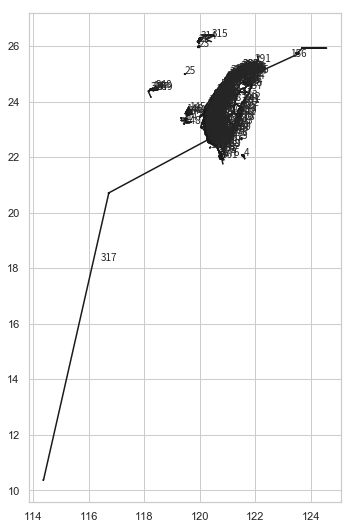

In [232]:
plot_map(sf)


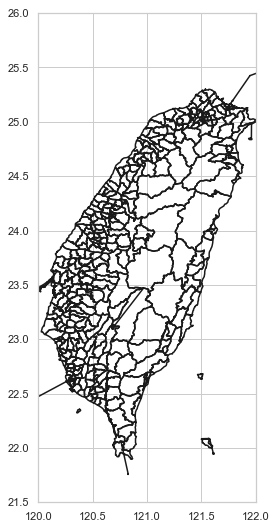

In [233]:
y_lim = (21.5,26) # latitude 
x_lim = (120, 122) # longitude
plot_map(sf, x_lim, y_lim)

In [234]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    ax = plt.axes()
    ax.set_aspect('equal')
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

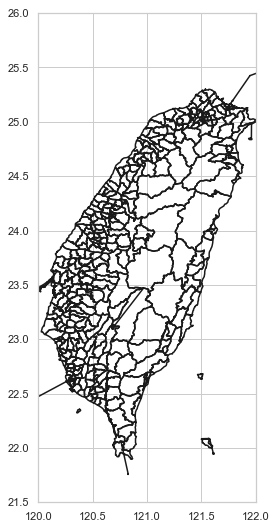

In [235]:
plot_map2(25, sf, x_lim, y_lim)

In [236]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    ax = plt.axes()
    ax.set_aspect('equal')
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

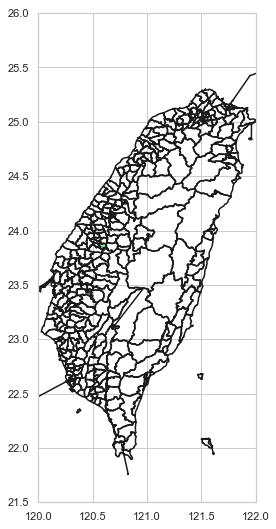

In [237]:
plot_map_fill(5, sf, x_lim, y_lim, color='g')


In [240]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    ax = plt.axes()
    ax.set_aspect('equal')
    
    
    fig.suptitle(title, fontsize=16, fontproperties=myfont)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id,  fontproperties=myfont,fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

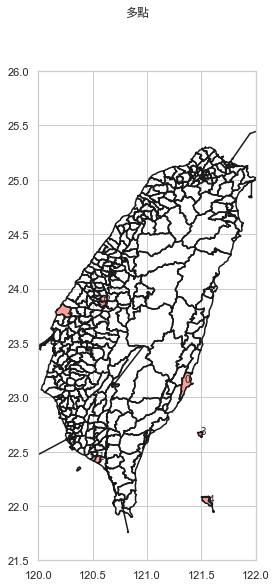

In [244]:
y_lim = (21.5,26) # latitude 
x_lim = (120, 122) # longitude

town_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids( '多點', 
                            town_id, sf, color = 'r',
                            x_lim = x_lim, y_lim = y_lim)

In [247]:
def calc_color(data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0'];
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3:
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [282]:
def plot_comunas_data(sf, title, comunas, data=None,color=None, print_id=False, x_lim=None,y_lim=None):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        #i = conv_comuna(i).upper()
        comuna_id.append(df_map[df_map.TOWNNAME == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim, 
                                     y_lim, 
                                     figsize = (11,9));

In [283]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    ax = plt.axes()
    ax.set_aspect('equal')
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')

        for id in comuna:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)



1: 0 => -1 
2: 0 => -1 
3: 0 => -1 
4: 0 => -1 
5: 0 => -1 
6: 0 => -1 

   1   2   3   4   5   6


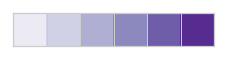

<Figure size 792x648 with 0 Axes>

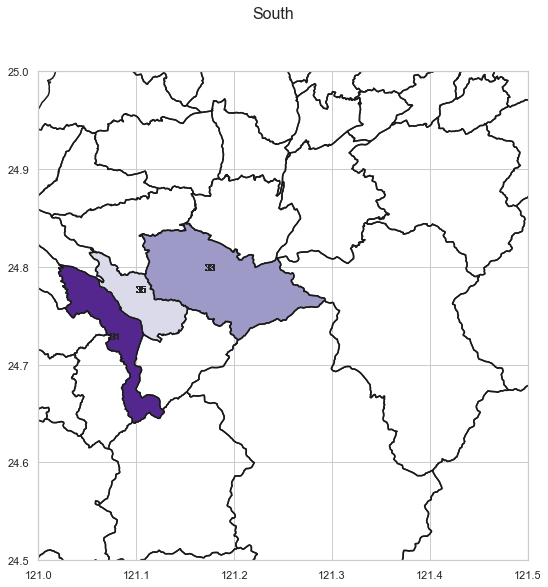

In [285]:
y_lim = (24.5, 25) # latitude 
x_lim = (121, 121.5) # longitude

south = ['竹東鎮','芎林鄉','關西鎮']
data = [0.5, 0.2, 0.3]
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'

plot_comunas_data(sf, title='South', comunas=south, data=data, color=color_pallete, print_id=print_id, x_lim=x_lim, y_lim=y_lim)
